# Practical 3: Deep Feed-forward Networks
**NNT and Fuzzy logic Lab 2**




**anyone didnot submit the assingment got -2  out of ten :-)**

## Introduction
In this practical, we implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called **"Fashion MNIST"**, consisting of small greyscale images of items of fashion. We consider the practical issues around generalisation to out-of-sample data and introduce some important techniques for addressing this.

Before diving into the Neural network part we first have an introduction to Tensorflow, a very popular deep learning framework that is used in all aspects of defining, training and testing models. 
## Learning objectives
* Understand the basics of Tensorflow
* Use **Tensorflow Eager** and **Keras Layers** to build a neural network archetecture
* Understand how a model is trained and evaluated
* Differentiate between **in-sample** and **out-of-sample** model performance
* Understand the concept of **train/validation/test split** and why it's useful
* Research at least 1 techniques that can be used to improve model **generalisation**

# Tensorflow
As described in Wikipedia TensorFlow is a computational framework for building machine learning models. It is the second generation system from Google Brain headed by Jeff Dean. Launched in early 2017, it has disrupted the ML world by bringing in numerous capabilities from scalability to building production ready models.

TensorFlow (TF) is an open source software library for numerical computation using the concept of Tensors.

 **Tensors:**

 You can think of Tensors as being a generalisation of matrices to higher dimensions, or roughly equivalent to multi-dimensional arrays. 
 
 Scalars are 0-dimensional tensors, vectors are 1-dimensional, standard matrices are 2-dimensional, and higher-dimensional tensors have 3 or more dimensions. 
 
**Dimensions:**

 You can think of dimensions as representing groups of numbers that mean the same thing. For example, for images, we often use 3-dimensional tensors where the first dimension represents the red, green, and blue color channels of the image, and the next two are the columns and rows of pixels of the image. 

**Major Advantage of Tensorflow**

The major advantage of using TensorFlow is that it can automatically derive the gradients of many mathematical expressions involving tensors. It achieves this through a process called "automatic differentiation". Tensorflow also supports multiple "kernels", allowing you to easily run your code on normal processors (CPUs), graphics cards (GPUs) and other more exotic hardware accelerators like Google's Tensor Processing Units (TPUs).

Tensorflow actually provides **two modes of operation**, the first, called "graph mode", builds a computation graph upfront and then feeds data into the graph.

**lazy mode**

all code must be within session and one add the graph in the session and to perform any ooeration in the session one uses session.run()

Tensorflow one works using lazy execution mode you draw the graph by defining the variables and if you want to do operation which contains the two variables togther one has to link them via node


By building the graph upfront, Tensorflow can apply optimisations to the graph that allow it to extract peak performance from the hardware you're running on. You will have encountered this mode if you used Tensorflow before or attended the Indaba last year!
 
 **Eager Mode**

The second mode, called ["Eager-mode"](https://www.tensorflow.org/guide/eager), is a lot newer and evaluates Tensor operations imperatively (in the order you write them), similar to NumPy and PyTorch. Eager-mode is slightly less performant but a lot more intuitive, especially if you've never used a "define-and-run" programming style (like graph mode) before, and is therefore the mode we will use in these practicals. 

In [ ]:
#@title Imports (RUN ME!) { display-mode: "form" }

#!pip install tensorflow-gpu==2.0.0-beta0 > /dev/null 2>&1

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#print("TensorFlow executing eagerly: {}".format(tf.executing_eagerly()))

For statrers, we can define a constant which is a tensor whose value cannot be changed at all. It can take many shapes and dimentions as the examples below show.

We can also declare variable tensors which values change. Their declaration is abit different but the code below shows the difference between the two:

In [ ]:
#TF one

#for declaring constants we use the ft.constant function
x1 = tf.constant(3)            #shape ()
x2 = tf.constant([3, 5, 7])    #shape (3,)
#we can use tf.stack to create higher dimentinal matricies
x3 = tf.stack([x2, x2])        #shape (2, 3)

#for declaring a variable we use the function tf.get_variable and we manuplate them using the tf.variable class


my_var = tf.compat.v1.get_variable("my_var", [1, 2, 3])

init_op = tf.compat.v1.global_variables_initializer()
print (x1)
print(x2)
print(x3) 
print(my_var)


tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([3 5 7], shape=(3,), dtype=int32)
tf.Tensor(
[[3 5 7]
 [3 5 7]], shape=(2, 3), dtype=int32)
<tf.Variable 'my_var:0' shape=(1, 2, 3) dtype=float32, numpy=
array([[[ 0.78689206, -0.7255975 , -0.5815888 ],
        [ 1.0946741 , -0.25207382, -0.37011033]]], dtype=float32)>


As you might have noticed, running the above code results in printing tensor abstract but not the values themselves. This is because a Tensorflow code is just an abstract representation of what will be run in the Tensorflow session. A session encapsulates state of Tensorflow runtime and runs Tensorflow operations. Tesnorflow represents the written code in an unserlying graph. Take the following code, it is represented by the grave underneath it.

In [ ]:
# sessions = tf.compat.v1.Session()
x = tf.constant([1, 2, 3], name = "x")
y = tf.constant([4, 5, 6], name = "y")
z1 = tf.add(x, y, name = "z1")
z2 = x * y
z3 = z2- z1

![alt text](https://miro.medium.com/max/314/1*B9L6Y6lz1NzFFjyC1YMeYA.png)

when we run the session thats when the value are inputed and we can get the values of the Tensors.

In [ ]:
# print(sessions.run(z3))
# sessions.close()
print(z3)

tf.Tensor([-1  3  9], shape=(3,), dtype=int32)


### Basic TensorFlow operations
#### Addition and Subtraction

In [ ]:
#lazy-mode
print('Lazy mode')
with tf.compat.v1.Session() as session:
  a1 = tf.constant([1, 2, 3])
  a2 = tf.constant([3, 4, 5])
  a3 = a1 + a2
  a4 = a1 - a2
  print(f'printing a3: {session.run(a3)}')
  print(f'printing a4: {session.run(a4)}')
#print(a3)

#if one removed the below a1 and a2 we will encounter error since we will be at the lazy mode
# Result [4, 6, 8]
print('eager mode')
a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 + a2 # (tf.add(a1, a2) also works. TensorFlow supports primitive operators)
a4 = a1 - a2
# with tf.Session() as session:
#     print(session.run(a4))
print(a4)

# Result [-2, -2, -2]

printing a3: [4 6 8]
printing a4: [-2 -2 -2]
tf.Tensor([-2 -2 -2], shape=(3,), dtype=int32)


#### Multiplication and Division

In [ ]:
#ToDo make multipication using lazy mode:




a1 = tf.constant([1, 2, 3])
a2 = tf.constant([3, 4, 5])
a3 = a1 * a2 # (tf.mul(a1, a2) also works. TensorFlow supports primitive operators)

# with tf.Session() as session:
#     print(session.run(a3))
print(a3)

# Result [3, 8, 15]

a4 = a1/a2
# with tf.Session() as session:
#     print(a4.eval())  # eval() can be used instead of session.run() to compute the results of a particular variable.

print(a4)

# Result [0.34, 0.5, 0.6]

#### Reshape

In [ ]:
a1 = tf.constant(([3, 5, 7],
                 [4, 6, 8]))  # Shape is (2, 3)
a2 = tf.reshape(a1, [3, 2])
#reshape first transform the tensor into vector - 1D- then checks if the vector has the same length as the new tensor and then creates the new data
#[3,5,7,4,6,8] --> [[3,5],[7,4],[6,8]]

with tf.compat.v1.Session() as sess:
  a1 = tf.constant(([3, 5, 7],
                 [4, 6, 8]))  # Shape is (2, 3)
  a2 = tf.reshape(a1, [3, 2])
  print(a2.eval())
  print('############################')


a1 = tf.constant(([3, 5, 7],
                 [4, 6, 8]))  # Shape is (2, 3)
a2 = tf.reshape(a1, [3, 2])
print(a2)
    
# Result[[3, 5], [7, 4], [6, 8]]

[[3 5]
 [7 4]
 [6 8]]
############################
tf.Tensor(
[[3 5]
 [7 4]
 [6 8]], shape=(3, 2), dtype=int32)


## Now restart the runtime and run the cell below to install Tensorflow v2.0 and start using Tensorflow Eager mode

In [ ]:
#@title Imports (RUN ME!) { display-mode: "form" }

# !pip install tensorflow-gpu==2.0.0-beta0 > /dev/null 2>&1

# import tensorflow as tf
# import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline

print("TensorFlow executing eagerly: {}".format(tf.executing_eagerly()))

TensorFlow executing eagerly: True


Now that we got the basics of tensorflow we can delve into the meat of the practical and start on the Feed-forward Network
### The Data
In this practical, we use the Fashion MNIST dataset consisting of 70,000 greyscale images and their labels. The dataset is divided
 into 60,000 training images and 10,000 test images. 
 
The idea is to train a **classifier** to identify the class value (what type of fashion item it is) given the image. We train and *tune* a model on the 60,000 training images and then evaluate how well it classifies the 10,000 test images that the model did not see during training. This task is an example of a **supervised learning** problem, where we are given both input and labels (targets) to learn from. This is in contrast to **unsupervised learning** where we only have inputs from which to learn patterns or **reinforcement learning** where an agent learns how to maximise a reward signal through interaction with its environment. 

In [ ]:
# Tensorflow has convenient modules for loading a number of standard datasets
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_and_validation_images, train_and_validation_labels), (test_images, test_labels) = fashion_mnist.load_data()

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#each image is 28 by 28 pixels image

4431872/4422102 [==============================] - 0s 0us/step


### Train/Validation/Test Split

When we build machine learning models, the goal is to build a model that will perform well on *future* data that we have not seen yet. We say that we want our models to be able to **generalise** well from whatever training data we can collect and do have available, to whatever data we will be applying them to in future. To do this, we split whatever data we have available into a **training set, a validation set and a test set**. The idea is that we train our model and use the performance on the validation set to make any adjustments to the model and its hyperparameters, but then we report the final accuracy on the test set. The test set (which we never train on), therefore acts as a proxy for our future data.

### Construct a validation set
Next, we remove 10,000 images and labels from the training set to use as a validation set. We will come back to the validation set later! 

In [ ]:
# Construct a validation set from the last 10000 images and labels from
# train_and_validation_images and train_and_validation_labels

validation_images = train_and_validation_images[-10000:, :, :]
validation_labels = train_and_validation_labels[-10000:]

# Construct a training set from the first 50000 images and labels.
train_images = train_and_validation_images[:50000, :, :]
train_labels = train_and_validation_labels[:50000]

In [ ]:
train_images[0].shape

(28, 28)

### What does the data look like?
Each image in the dataset consists of a 28 x 28 matrix of greyscale pixels. The values are between 0 and 255 where 0 represents black, 255 represents white and there are many shades of grey in-between. Each image is assigned a corresponding numerical label, so the image in ```train_images[i]``` has its corresponding label stored in ```train_labels[i]```. We also have a lookup array called ```text_labels``` to associate a text description with each of the numerical labels. For example, the label 1 is associated with the text description "Trouser".

The 2 cells below demonstrate how to visualise the input data. Make sure you understand what's happening, particularly how the indices correspond to individual items in the dataset. 

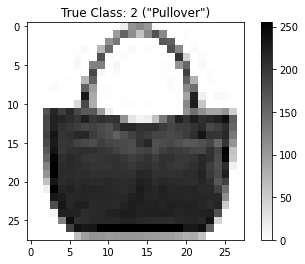

In [ ]:
# We use the Matplotlib plotting library to visualise an image selected at random from the training set
plt.figure()
random_index = np.random.randint(0, len(train_images))
#generate random index with value from 0 to the length of the dataset
plt.imshow(train_images[random_index], cmap='gray_r')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False)

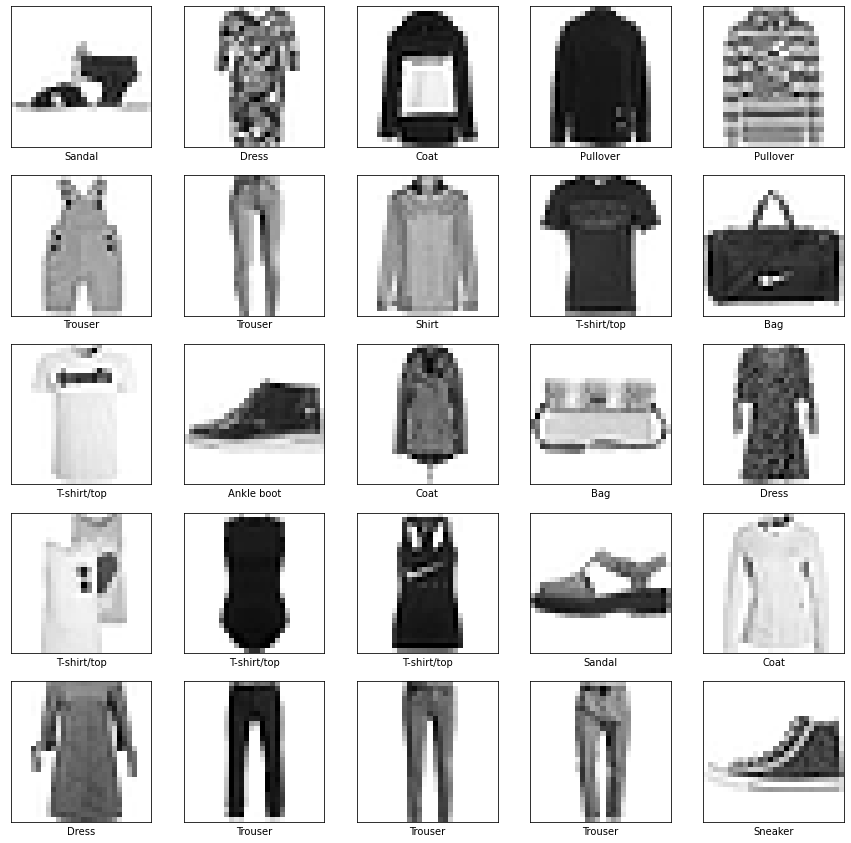

In [ ]:
# Another view, showing 25 randomly selected images at a time
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    #subplot(rows, cols, index of the image in the row)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 50000)
    plt.imshow(train_images[img_index], cmap="gray_r")
    plt.xlabel(text_labels[train_labels[img_index]])

### Exploratory Task
Run the above cells multiple times to get a good sense of the dataset. Look at the general structure of the images and their corresponding labels. Can you spot some classes that might be difficult for a classifier to distinguish? If so, why do you think they would be difficult to distinguish? Chat to your neighbour about this. 


### Preparing the data with TensorFlow
At the moment, our training data consists of two large tensors. The images are stored in a tensor of shape $[50000, 28, 28]$, consisting of all the $28 \times 28$ images matrices stacked together. The labels are stored in a 1D vector of shape $[50000]$. We wish to train a model using **mini-batch stochastic gradient descent**. In order to do so, we need to shuffle the data and split it into smaller (mini-)batches. We also convert the data from numpy arrays to TensorFlow Tensors.


In order to do this batching (and shuffling) we will use the Tensorflow [Dataset API](https://www.tensorflow.org/api_docs/python/tf/data/Dataset), which is a set of simple reusable components that allow you to build efficient data pipelines.

**Pipeline**: is about taking the data from its raw shape, followed by performing all the pre-processing tasks, followed by mini-batch process and then to the training step,  the pipeline must be valid with all the dataset

 Data is said to "stream" through the pipeline, meaning that when something at the output of the pipeline wants data, the pipeline will provide that data as soon as it has enough, rather than waiting to process all the data. This allows you to easily build pipelines that work on large datasets without having to load it all into memory in one go!

We build this pipeline step-by-step:

We start by defining the ```batch_size``` hyperparameter of our model. This hyperparameter controls the sizes of the mini-batches (chunks) of data that we use to train the model. The value you use will affect the memory usage, speed of convergence and potentially also the performance of the model. It also interacts with the *learning rate* used in gradient descent. 

In [ ]:
batch_size = 128
#batch_size must be power of 2 why ?

The first component we add will group the image and label tensors together into a tuple and then split them into individual entries - ie. 50000 tuples containing a (28, 28) dimensional image and 1D label associated with that image. The following line adds this splitting component to the pipeline.

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
#train_ds = (image, label)

The next thing we do is apply a map operation. This lets us run an arbitrary function on each element. The function we provide returns the image values divided by 255 and converted ('cast') to a float and the label converted to a 32-bit integer.

**NOTE**: "Lambda" functions are just one-line, anonymous functions. In this case, it defines a function that takes arguments x and y (before the colon), and outputs their manipulated values (after the colon).

In [ ]:
# Divide image values and cast to float so that they end up as a floating point number between 0 and 1
train_ds = train_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))
#normalization the value fo the images between 0 - 1
#the label is from 0 to 9

Then we add a **shuffle** component. This returns a random element from the pipeline. Can you spot a potential problem here? 



In [ ]:
# Shuffle the examples.
train_ds = train_ds.shuffle(buffer_size=batch_size * 10)
#the buffer_size must be at least 10 times the batch_size to ensure the data passed to the model is shuffled, otherwise the data will not shuffled properly :(

The final component in our pipeline is the batch component. This just requests `batch_size` elements from the previous pipeline component, groups them together into a single tensor and returns that.

In [ ]:
# Now "chunk" the examples into batches
#divide the shuffled dataset into batches
train_ds = train_ds.batch(batch_size)

# The output of this pipeline will be tuples of tensors containing images and labels.
# The images will be of shape (batch_size, 28, 28) and the labels of shape (batch_size, )

Finally, we apply the same pre-processing (converting to Tensors and normalising the values to lie between 0 and 1) to the validation set. 

In [ ]:
# Don't worry about this for now, we will use the validation set later
val_ds = tf.data.Dataset.from_tensor_slices((validation_images, validation_labels))
val_ds = val_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, tf.cast(y, tf.int32)))

#no need to shuffle in the validation dataset,  since we use all of it to for validating our model

## Define the model
In this section we'll build a classifier. A **classifier** is a function that takes an object's characteristics (or "features") as inputs and outputs a prediction of the class (or group) that the object belongs to. It may make a single prediction for each input or it may output some score (for example a probability) for each of the possible classes. Specifically, we will build a classifier that takes in (a batch of) 28 x 28 Fashion MNIST images as we've seen above, and outputs predictions about which class the image belongs to. 

For each (batch of) input images, we will use a **feed-forward neural network** to compute un-normalised scores (also known as **logits**) for each of the 10 possible classes that the image could belong to. We can then **classify** the image as belonging to the class which receives the highest score, or we can quantify the model's "confidence" about the classifications by converting the scores into a probability distribution. 

A feed-forward neural network consisting of $N$ layers, applied to an input vector $\mathbf{x}$ can be defined as:

\begin{equation}
\mathbf{f_0} = \mathbf{x} \\
\mathbf{f_i} = \sigma_i(\mathbf{W_if_{i-1}} + \mathbf{b_i}) \ \ \ i \in [1, N]
\end{equation}

Each layer has a particular number, $m_i$, of neurons. The parameters of a layer consist of a matrix $\mathbf{W_i} \in \mathbb{R}^{m_i \times m_{i-1}}$ and bias vector $\mathbf{b_i} \in \mathbb{R}^{m_i}$. Each layer also has a non-linear activation function $\sigma_i$. 



###  Activation functions



Activation functions are a core ingredient in deep neural networks. In fact they are what allows us to make use of multiple layers in a neural network. There are a number of different activation functions, each of which are more or less useful under different circumstances. The four activation functions that you are most likely to encounter are, arguably, [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU), [Tanh](https://www.tensorflow.org/api_docs/python/tf/keras/activations/tanh), [Sigmoid](https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid), and [Softmax](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Softmax). 

ReLU, has in recent years, become the default choice for use in MLPs and Convolutional Neural Networks (CNNs). ReLU has two advantages over Tanh and Sigmoid: it is computationally much more efficient, and, it allows us to use deeper networks because it does not suffer from [vanishing gradients](https://en.wikipedia.org/wiki/Vanishing_gradient_problem). As a result of their success, a number of ReLU variants, such as [LeakyRelu](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LeakyReLU) and [PReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/PReLU), have been developed.

Sigmoid and Softmax activations are often found after the last layer in binary and multi-class classification networks, respectively, as they transform the outputs of the network in such a way that we can interpret them as class probabilities.

Both Tanh and Sigmoid are found in LSTM and GRU recurrent neural networks, which we will find out more about in the coming days. They are also useful in MLPs and CNNs where we want the output to be bounded between -1 and 1 (Tanh) or 0 and 1 (Sigmoid).

Read more about activation functions [here](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6). 

### Configure the feed-forward neural network
We configure the feed-forward neural network part of our classifier using the [Keras Layers API](https://www.tensorflow.org/api_docs/python/tf/keras/layers). This API consists of various reusable building-blocks that allow us to define many different neural network architectures (similar to how we defined a data pipeline earlier!). 

Here we use the [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) component which allows us to wrap together a sequence of layers. An important point to note here is that we are **configuring** our neural network architecture as a pipeline. We can think of the resulting ```model``` variable as a *function* that takes a batch of images as inputs and outputs a batch of logits. 

In [ ]:
# RE-RUN THIS CELL if you want to restart training!
#note here we are flattening the dataset


model = tf.keras.Sequential([
    # Convert the 28x28 image into a flat vector of 28x28 = 784 values
    tf.keras.layers.Flatten(input_shape=(28, 28), name='flatten_input'),
    # Create a "hidden" layer with 256 neurons and apply the ReLU non-linearity
    tf.keras.layers.Dense(256, activation=tf.nn.relu, name='input_to_hidden1'),
    # Create another hidden layer with 128 neurons
    tf.keras.layers.Dense(128, activation=tf.nn.relu, name='hidden1_to_hidden2'),
    # Create an "output layer" with 10 neurons
    tf.keras.layers.Dense(10, activation='softmax', name='hidden_to_logits'),
])

The following summary shows how many parameters each layer is made up of (the number of entries in the weight matrics and bias vectors). Note that a value of ```None``` in a particular dimension of a shape means that the shape will dynamically adapt based on the shape of the inputs. In particular, the output shape of the ```flatten_input``` layer will be $[N, 784]$ when the batch of inputs passed to the model has shape $[N, 28, 28]$

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_input (Flatten)      (None, 784)               0         
_________________________________________________________________
input_to_hidden1 (Dense)     (None, 256)               200960    
_________________________________________________________________
hidden1_to_hidden2 (Dense)   (None, 128)               32896     
_________________________________________________________________
hidden_to_logits (Dense)     (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


**Quiz**:

 Note that the flattening operation has no parameters. However, the Dense (fully-connected) layer mapping from the 784-D output of the flatten operation to the 256-D hidden layer has 200,960 parameters! Can you explain why the first dense layer has 200,960 parameters?  and the second layer has 32896 ? and the final layer has 1290 ?

### Define the loss
As we did in the previous practical, we need to specify a loss function for our classifier. This tells us how good our model's predictions are compared to the actual labels (the targets), with a lower loss meaning better predictions. 

The standard loss function to use with a **multi-class classifier** is the **cross-entropy loss** also known as the "negative log likelihood" for a classifier. Suppose we have a classification problem with $C$ classes. A classifier is trained to predict a probability distribution $p(y | X_i)$ for each input $X_i$ from a batch of $N$ examples. The vector $p(y|X_i)$ is $C$ dimensional, sums to one, and we use $p(y|X_i)_c$ to denote the $c$th component of  $p(y|X_i)$. The true class for example $i$ in the batch is $y_i$ and we define the indicator function $\mathbb{1}[y_i=c]$ to be 1 whenever $y_i = c$ and $0$ otherwise. This classifier has a cross-entropy loss of

$- \frac{1}{N}\sum_{i=1}^N \sum_{c=1}^C log( p(y|X_i)_c) \mathbb{1}[y_i=c]$

**NOTE**: The indicator is one for the true class label, and zero everywhere else. So in that sum, the indicator just "lifts out" the $log(p(y|X_i))$ values for all true classes. So the above expression is minimised (note the negative at the front) when the model places all its probability mass on the true labels for all the examples. Remember that  log(1)=0 , thus the closer all probabilities of $y_i = c$ are to one, the lower the loss will be and the better the model will be performing.


Fortunately we don't need to write this function ourselves as Tensorflow provides a version called 

```tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)```. 

**NOTE**: This function actually computes the cross entropy loss directly from the un-normalised logits, rather than from the probability distribution for numerical stability.

By the way, for training data in which the labels are themselves distributions rather than exact values, this definition of cross-entropy still works, where the indicator function is replaced with the corresponding probability of each class for that example. This might be important when we are not sure whether the training data has been labelled correctly, or when the data was labelled by a human who gave their answer along with a degree of confidence that the answer was correct

## Train the model
Now that we have our data, data processing pipeline, our neural network architecture and the corresponding loss that we want to minimise, we need to **train** the model using batched stochastic gradient descent. We do this in multiple **epochs**, which is a single iteration through the entire training dataset. Briefly, in each epoch we loop over all the batches of images and labels, and for each batch we perform the following steps:
* Get the **predictions** of the model on the current batch of images
* Compute the **average loss** values across the batch, telling us how good these predictions are / how close they are to the true targets.
* Compute the **gradient of the average loss** (or the average gradient of the losses in the batch) with respect to each of the model's parameters: This tells us the direction to move in "parameter space" to decrease the loss value
* **Adjust the parameters** by taking a small step in the direction of each component of the gradient (where the learning rate controls the size of the step)

During training we also track some metrics, such as the loss and accuracy to see how well the classifier is doing. Note that the cell below may take a few minutes to run! 



### Defining the training loop

In [ ]:
# Choose an optimizer and loss function for training:
# The optimizer is responsible for controlling the learning rate


# this code is for stochastic gradient descent

optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Select metrics to measure the loss and the accuracy of the model. 
# These metrics accumulate the values over epochs and then print the overall result.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
model.compile(optimizer, loss_object, metrics=['acc'])

history = model.fit(x= train_images, y= train_labels, batch_size=256, epochs=50, validation_data=(validation_images, validation_labels))


Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


196/196 [==============================] - 1s 6ms/step - loss: 0.3797 - acc: 0.8709 - val_loss: 9.5353 - val_acc: 0.8305
Epoch 2/50
196/196 [==============================] - 1s 4ms/step - loss: 0.3793 - acc: 0.8746 - val_loss: 10.0434 - val_acc: 0.8525
Epoch 3/50
196/196 [==============================] - 1s 4ms/step - loss: 0.3812 - acc: 0.8705 - val_loss: 10.2023 - val_acc: 0.8442
Epoch 4/50
196/196 [==============================] - 1s 4ms/step - loss: 0.3521 - acc: 0.8756 - val_loss: 9.7193 - val_acc: 0.8478
Epoch 5/50
196/196 [==============================] - 1s 4ms/step - loss: 0.3618 - acc: 0.8757 - val_loss: 10.7187 - val_acc: 0.8540
Epoch 6/50
196/196 [==============================] - 1s 4ms/step - loss: 0.5608 - acc: 0.8671 - val_loss: 9.3935 - val_acc: 0.8382
Epoch 7/50
196/196 [==============================] - 1s 4ms/step - loss: 0.4068 - acc: 0.8651 - val_loss: 8.7913 - val_acc: 0.8502
Epoch 8/50
196/196 [==============================] - 1s 4ms/step - loss: 0.3613 - a

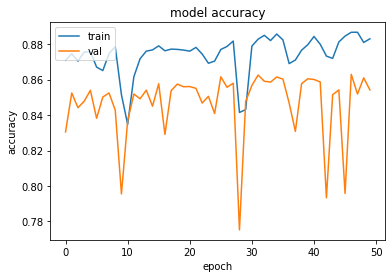

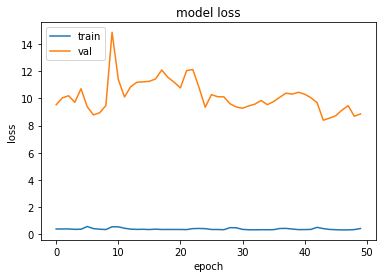

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The above code block shows a typical training loop. There's actually an easier way to do this using Tenosrflow and Keras, which we'll see in the next prac, but for now we expand it so you can see what's going on.

Lets visualise some of the model's prediction on the training set

 ### Optional extra reading: Optimisation schemes

You might have noticed that we are using the Adam optimizer to train our neural networks. Adam is a variant of stochastic gradient descent which often performs well in practice. In fact, there is a whole range of variations on stochastic gradient descent that are often used. Here is an illustration showing how a few of these methods perform on a toy problem: 

![optimization methods](http://ruder.io/content/images/2016/09/saddle_point_evaluation_optimizers.gif)

For a detailed description of various optimization methods read [this](http://ruder.io/optimizing-gradient-descent/) article. For a great visual discussion on how these methods work see [this](https://distill.pub/2017/momentum/) article.

## Testing

After 50 epochs of training on our training set, we obtain a loss of around 0.061 and accuracy of 97.7%. That's pretty good, right? 

It is important to distinguish between data that is **in-sample** and **out-of-sample**. Our training data is all in-sample and we would expect any resonably powerful model (like an MLP) to be very accurate and have a low loss on this (in fact, with a sufficiently large MLP and enough training epochs, we can get the loss arbitrarily close to zero!). This is not a good thing though, because pushing the loss close to zero may mean that the model has fit the **noise** in the training data rather than the true signal. If this is the case, it will not perform well on out-of-sample data that it has not seen before (which is what we really care about!). To assess this, we evaluate our trained model on the held-out test set (but we don't update the parameters of the model when testing it, that would be cheating!)

In [ ]:
# We need to apply the same pre-processing to the test set as we did to the training set
# Since we don't need batching or shuffling, we can do this directly instead of
# building a tf.Dataset pipeline

tf_test_images = tf.convert_to_tensor(test_images, dtype=tf.float32) / 255.0
tf_test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

In [ ]:
test_logits = model(tf_test_images, training=False)

# Compute the average cross-entropy loss of the classification over the entire test set
test_loss = tf.keras.metrics.Mean(name='test_loss')
t_loss = loss_object(tf_test_labels, test_logits)
test_loss(t_loss)

# Compare predicted labels to actual labels
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')
test_accuracy(tf_test_labels, test_logits)

print('Completed testing on', tf_test_images.shape[0], 'examples...')
print('Loss: {:.3f}, Accuracy: {:.3%}'.format(test_loss.result(), test_accuracy.result()))

Completed testing on 10000 examples...
Loss: 0.646, Accuracy: 83.200%


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


And again we visualise some of the model's predictions:

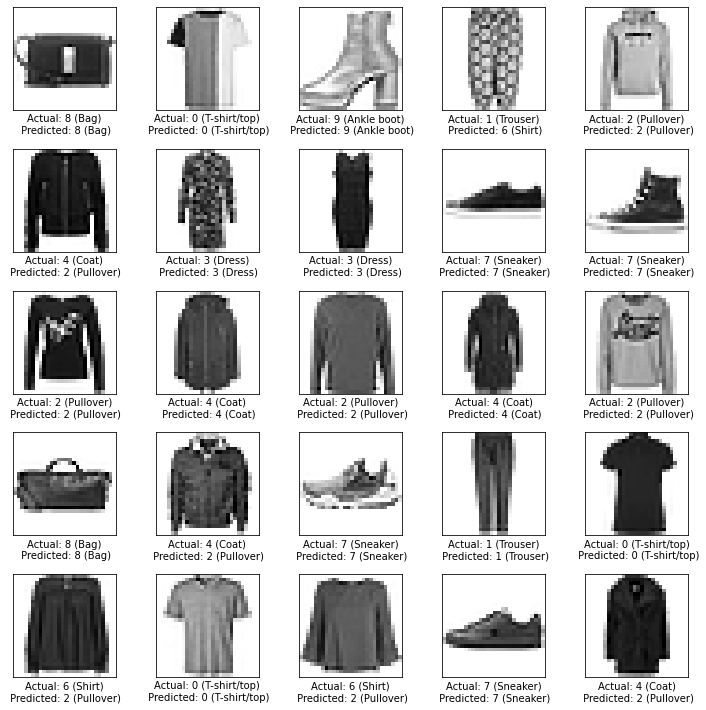

In [ ]:
test_predictions = tf.argmax(test_logits, axis=1, output_type=tf.int32)

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    img_index = np.random.randint(0, 10000)
    plt.imshow(test_images[img_index], cmap="gray_r")

    actual_label = int(test_labels[img_index])
    predicted_label = int(test_predictions[img_index])

    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))

plt.tight_layout()
plt.show()

What happened? We got 97.7% accuracy on the training set, but only 88.9% on the test set. This is an example of how a model's in-sample performance differs from its out-of-sample performance. It may even be considered **overfitting** (where the model failing to generalise its in-sample performance to unseen out-of-sample data). There are a number of ways we can address this, but first, it's important to realise that we should try and keep the number of evaluations on the test set to a minimum. 


The first important method is called **validation**. Using validation, we reserve a portion of our training dataset and call it the validation set. After each epoch of training (or every K epochs where K can be a fraction), we evaluate our model on this validation set (without updating the model parameters). This gives us a good sense of how well we expect our model to do on out-of-sample data. In this way, the validation set acts as a surrogate for the test set which we can safely use during model development and training. We can also use this validation set to tune our model by selecting hyperparameters such as the batch size, sizes of layers or the network architecture. 


### Optional extra reading: Underfitting

In addition to the problem of _overfitting_ (in which the model is too complex and as a result is able to memorize the training data rather than learning a general pattern) there is the problem of _underfitting_ which is the opposite. Underfitting occurs when the model does not have enough complexity (also known as capacity) to learn a general pattern. While overfitting is characterised by diverging test/validation and training scores, underfitting is characterised by test/validation and training scores that very slowly continue to improve. 


Unlike overfitting which has a number of solutions, such as collecting more data, data augmentation, dropout, and L1/L2 regularization, underfitting has one simple solution: just make your model incrementally more complex until it no longer underfits.

![underandoverfitting](https://i.imgur.com/m2bSP1S.png)